# Image Registration of list of images:

### TODO: Use 34 images in this file path: \\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg. Use the middle image (17th image) as a reference image, since these images are labeled from top to bottom (of the skin). 17th image as reference, 16th and 18th image as image to be registered. The resulted registered 16th and 18th images are then used as a reference image to register the 15th, and the 19th, respectively. Keep doing this until you register all 34 images.

In [3]:
import numpy as np
import pandas as pd
import time
import imageio.v2 as imageio
from PIL import Image
import cv2
import os
import sys
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.data import stereo_motorcycle, vortex
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
# import SimpleITK as sitk

In [4]:
# function to pad images to same size:
def pad_images_to_same_size(images):
    """
    :param images: sequence of images
    :return: list of images padded so that all images have same width and height (max width and height are used)
    """
    width_max = 0
    height_max = 0
    for img in images:
        h, w = img.shape[:2]
        width_max = max(width_max, w)
        height_max = max(height_max, h)

    images_padded = []
    for img in images:
        h, w = img.shape[:2]
        diff_vert = height_max - h
        pad_top = diff_vert//2
        pad_bottom = diff_vert - pad_top
        diff_hori = width_max - w
        pad_left = diff_hori//2
        pad_right = diff_hori - pad_left
        img_padded = cv2.copyMakeBorder(img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=0)
        assert img_padded.shape[:2] == (height_max, width_max)
        images_padded.append(img_padded)

    return images_padded


In [21]:
# --- Load the sequence



start = time.time()

ref_img_path = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0049_49C1.jpg' #17th image
mov_img_path = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0046_46C1.jpg' #16th image

ref_img = Image.open(ref_img_path)
mov_img = Image.open(mov_img_path)

ref_img, mov_img = pad_images_to_same_size([np.array(ref_img),np.array(mov_img)])

# --- Convert the images to gray level: color is not supported.
ref_img = rgb2gray(ref_img)
mov_img = rgb2gray(mov_img)

# --- Compute the optical flow
v, u = optical_flow_tvl1(ref_img, mov_img)

# --- Use the estimated optical flow for registration

nr, nc = ref_img.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),
                                     indexing='ij')

image1_warp = warp(mov_img, np.array([row_coords + v, col_coords + u]),
                   mode='edge')

mov_img_warps =[]
for i in range(1,4):
    image1_warp = warp(image1[:,:,i], np.array([row_coords + v, col_coords + u]),mode='edge')
    image1_warps.append(image1_warp)

# build an RGB image with the unregistered sequence
seq_im = np.zeros((nr, nc, 3))
seq_im[..., 0] = mov_img
seq_im[..., 1] = ref_img
seq_im[..., 2] = ref_img

# build an RGB image with the registered sequence
reg_im = np.zeros((nr, nc, 3))
reg_im[..., 0] = image1_warp
reg_im[..., 1] = ref_img
reg_im[..., 2] = ref_img

end = time.time()
print("time it took to register: "+  str(end-start) + " seconds")


# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = ref_img
target_im[..., 1] = ref_img
target_im[..., 2] = ref_img

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

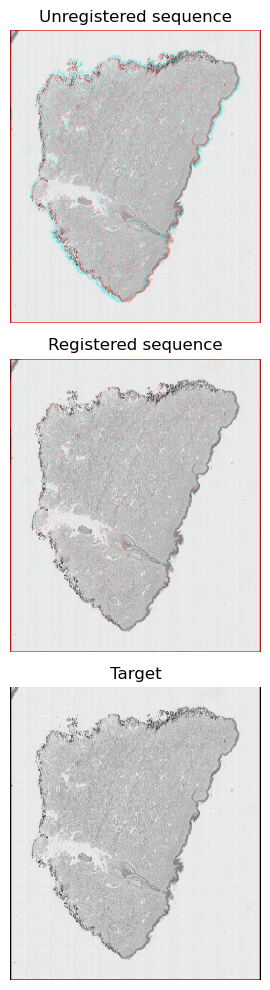

In [23]:
# build an RGB image with the registered sequence
target_im = np.zeros((nr, nc, 3))
target_im[..., 0] = ref_img
target_im[..., 1] = ref_img
target_im[..., 2] = ref_img

# --- Show the result

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(5, 10))

ax0.imshow(seq_im)
ax0.set_title("Unregistered sequence")
ax0.set_axis_off()

ax1.imshow(reg_im)
ax1.set_title("Registered sequence")
ax1.set_axis_off()

ax2.imshow(target_im)
ax2.set_title("Target")
ax2.set_axis_off()

fig.tight_layout()

In [22]:
from imageio.v2 import imwrite
reg_im_ra = np.array(reg_im).astype(np.uint8)
imwrite(r'\\fatherserverdw\Kevin\imageregistration\test.png',reg_im_ra)

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [4]:
# ref_img = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0049_49C1.jpg' #17th image
# mov_img = r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0046_46C1.jpg' #16th image
#
# ref_img = sitk.ReadImage(ref_img)
# mov_img = sitk.ReadImage(mov_img)
#
# ref_img = sitk.GetArrayFromImage(ref_img)
# mov_img = sitk.GetArrayFromImage(mov_img)
#
# ref_img, mov_img = pad_images_to_same_size([ref_img,mov_img])
#
# ref_img = ref_img.astype(float)
# mov_img = mov_img.astype(float)
#
# ref_img_1 = sitk.GetImageFromArray(ref_img, isVector = True)
# mov_img_1 = sitk.GetImageFromArray(mov_img, isVector = True)
#
# ref_img_2 = sitk.Cast(ref_img_1,sitk.sitkVectorFloat32)
# mov_img_2 = sitk.Cast(mov_img_1,sitk.sitkVectorFloat32)
#
# elastixImageFilter = sitk.ElastixImageFilter()
# elastixImageFilter.SetFixedImage(ref_img_2)
# elastixImageFilter.SetMovingImage(mov_img_2)
#
# parameterMapVector = sitk.VectorOfParameterMap()
# parameterMapVector.append(sitk.GetDefaultParameterMap("affine"))
# parameterMapVector.append(sitk.GetDefaultParameterMap("bspline"))
# elastixImageFilter.SetParameterMap(parameterMapVector)
#
# elastixImageFilter.Execute()
# result = elastixImageFilter.GetResultImage()


RuntimeError: Exception thrown in SimpleITK ElastixImageFilter_Execute: C:\dafne\SimpleElastix\Code\BasicFilters\src\sitkCastImageFilter.cxx:101:
sitk::ERROR: Filter does not support casting from casting vector of 32-bit float to 32-bit float

In [24]:
# --- Load the sequence
image0, image1, disp = stereo_motorcycle()

# --- Convert the images to gray level: color is not supported.
image0g = rgb2gray(image0)
image1g = rgb2gray(image1)

# --- Compute the optical flow
v, u = optical_flow_tvl1(image0g, image1g)

# --- Use the estimated optical flow for registration
nr, nc = image0g.shape

row_coords, col_coords = np.meshgrid(np.arange(nr), np.arange(nc),indexing='ij')

image1_warps =[]
for i in range(1,4):
    image1_warp = warp(image1[:,:,i], np.array([row_coords + v, col_coords + u]),mode='edge')
    image1_warps.append(image1_warp)


dl_warp = warp(dlmask, np.array([row_coords + v, col_coords + u]),mode='edge')

image1_warps.save
dl_warp.save

IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
# params = pe.get_default_params()
# params.MaximumNumberOfIterations = 200
# params.NumberOfResolutions = 3
#
# start = time.time()
# image3, field = pe.register(image1,image2,params)
# end = time.time()
# print("time it took to register: "+  str(end-start) + " seconds")
#
# img3 = Image.fromarray(image3)
# img3.show()
# img3 = img3.convert("L")
# img3.save(r'\\fatherserverdw\Kevin\image3.jpg')
# # overlay image 3 on top of image 1 and image 2 to see how well the image 2 is rotated in reference to image 1:
# alpha, beta = 0.5, 0.5
# overlay_img1_img3 = cv2.addWeighted(image1,alpha,image3,beta,0.0)
# img_overlay = Image.fromarray(overlay_img1_img3)
# img_overlay.show()
# img_overlay = img_overlay.convert("L")
# img_overlay.save(r'\\fatherserverdw\Kevin\overlay.jpg')
#
# another method:
# difference = image1 - image3
# difference = difference.astype(np.int)
# difference_df = pd.DataFrame(difference)
# difference_df = difference_df[difference_df>0]
# difference_df = difference_df.fillna(0)
# diff_counts = np.unique(difference_df,return_counts=True)[1]
# sum_diff = np.sum(diff_counts) - diff_counts[0]
# print("{} pixel values out of {} total pixel values are different".format(sum_diff,image1.shape[0]*image1.shape[1]))
# print("{}% pixel values are different".format(sum_diff*100/(image1.shape[0]*image1.shape[1])))
# # stack three x,y values (2d image) to 1 2d Image (x,y,3)
# ig1 = imageio.imread(r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0001_1C1.jpg')
# ig2 = imageio.imread(r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0004_4C1.jpg')
# ig3 = imageio.imread(r'\\fatherserverdw\Q\research\images\CLUE\3D study\he\4xr_jpg\z0007_7C1.jpg')
# #pad before:
# ig1, ig2, ig3 = pad_images_to_same_size([ig1,ig2,ig3])
# ig1 = cv2.cvtColor(ig1,cv2.COLOR_RGB2GRAY)
# ig2 = cv2.cvtColor(ig2,cv2.COLOR_RGB2GRAY)
# ig3 = cv2.cvtColor(ig3,cv2.COLOR_RGB2GRAY)
# # all img shape is (6264, 5352)
# rgb = np.stack([ig1,ig2,ig3],axis=2)
# rgbimg = Image.fromarray(rgb)
# rgbimg.show()
# rgbimg.save(r'\\fatherserverdw\Kevin\rgbimg.jpg')
# grayimg = cv2.cvtColor(np.array(rgbimg),cv2.COLOR_RGB2GRAY)
# grayimg = grayimg.astype(np.uint8)
# plt.imshow(grayimg)
#
# params = pe.get_default_params()
# params.MaximumNumberOfIterations = 200
# params.NumberOfResolutions = 3
#
# start = time.time()
# fin_img, field = pe.register(grayimg,ig1,params)
# end = time.time()
# print("time it took to register: "+  str(end-start) + " seconds")
#
# finimg = Image.fromarray(fin_img)
# finimg.show()
# img3 = img3.convert("L")
# img3.save(r'\\fatherserverdw\Kevin\image3.jpg')